In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760").fillna(0)
fiji = gpd.read_file("fiji-land.geojson").to_crs("EPSG:32760").fillna(0)
fiji_provinces = gpd.read_file("fiji_provinces.geojson").to_crs("EPSG:32760").fillna(0)
ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)
fiji_eez = gpd.read_file("Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)

/tmp/ipykernel_1337/1395316976.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:32760").fillna(0)
/tmp/ipykernel_1337/1395316976.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:32760").fillna(0)
/tmp/ipykernel_1337/1395316976.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the fu

<Axes: >

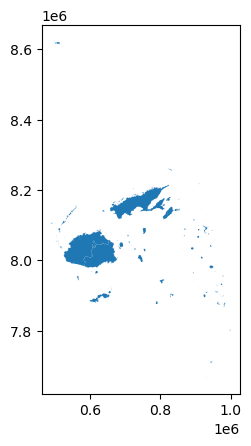

In [3]:
fiji_provinces.plot()


<Axes: >

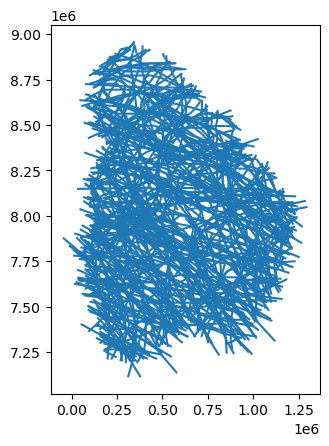

In [4]:
ibtracs_fiji.plot()

<Axes: >

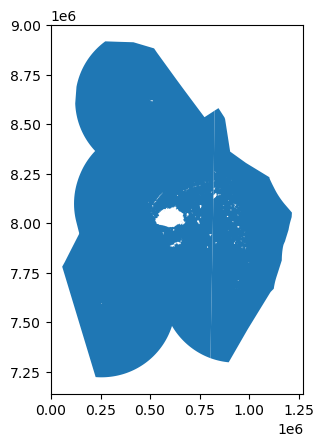

In [5]:
fiji_eez.plot()

/tmp/ipykernel_1337/4065018232.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


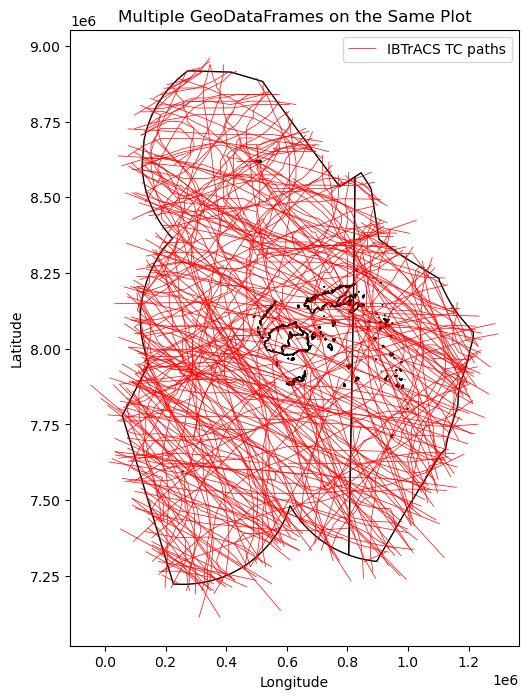

In [6]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji_provinces.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [7]:
fiji_eez

MRGID                         GEONAME  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
0   8325  Fijian Exclusive Economic Zone        2108    200NM        2108   

  TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  MRGID_SOV2  ...  ISO_SOV1  \
0       Fiji      FJI       Fiji           0           0  ...       FJI   

   ISO_SOV2  ISO_SOV3  UN_SOV1  UN_SOV2  UN_SOV3  UN_TER1  UN_TER2  UN_TER3  \
0         0         0      242        0        0      242        0        0   

                                            geometry  
0  MULTIPOLYGON (((976567.7 8309368.319, 978073.8...  

[1 rows x 32 columns]

                                                                         geometry  \
GEONAME                                                                             
Fijian Exclusive Economic Zone  POLYGON ((978073.84 8308286.706, 979579.993 83...   

                                MRGID  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
GEONAME                                                                  
Fijian Exclusive Economic Zone   8325        2108    200NM        2108   

                               TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  \
GEONAME                                                                     
Fijian Exclusive Economic Zone       Fiji      FJI       Fiji           0   

                                MRGID_SOV2  ...  AREA_KM2  ISO_SOV1  ISO_SOV2  \
GEONAME                                     ...                                 
Fijian Exclusive Economic Zone           0  ...   1302114       FJI         0   

                                ISO_SOV3  UN_

<Axes: >

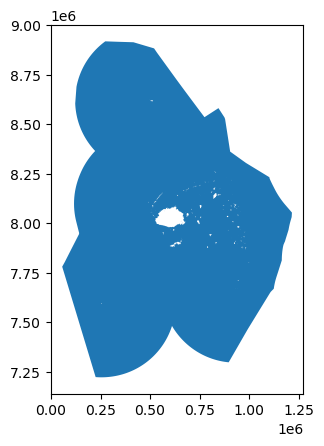

In [8]:
# Dissolve by a column (e.g., 'region')
gdf_dissolved = fiji_eez.dissolve(by='GEONAME')

# View the result
print(gdf_dissolved)

# Plot the dissolved GeoDataFrame
gdf_dissolved.plot()

/tmp/ipykernel_1337/3491853340.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


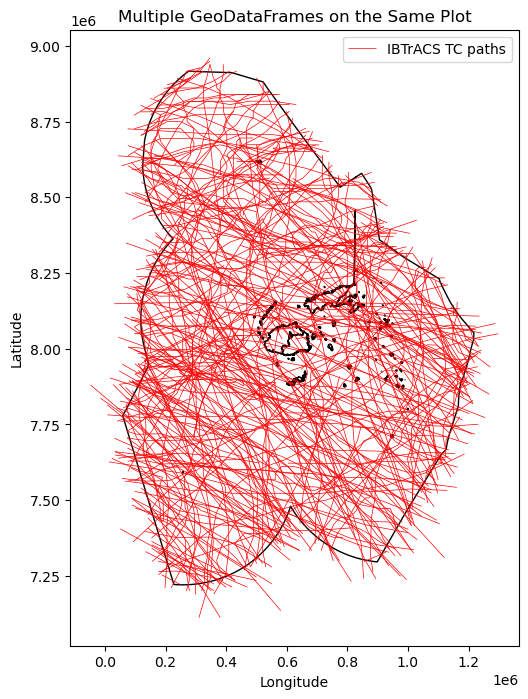

In [9]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
gdf_dissolved.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji_provinces.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [10]:
gdf_dissolved.to_file("eez_dissolved.geojson")

In [11]:
gdf_eez = gpd.read_file("figure_eez.geojson")

/tmp/ipykernel_1337/3942822355.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


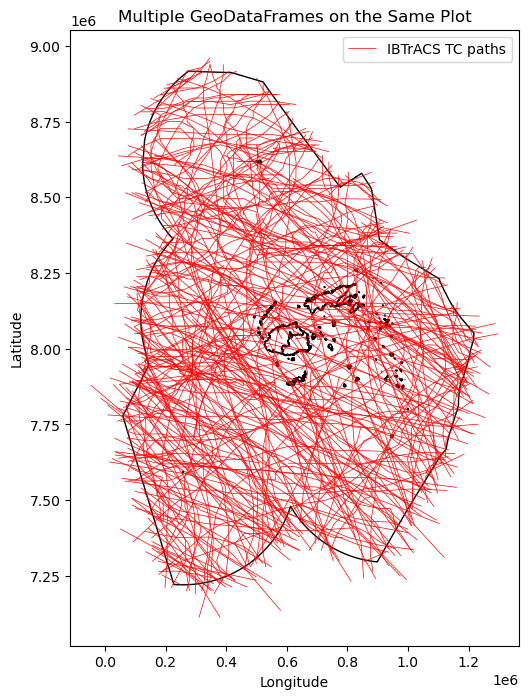

In [12]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
fiji_provinces.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/2182373696.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')


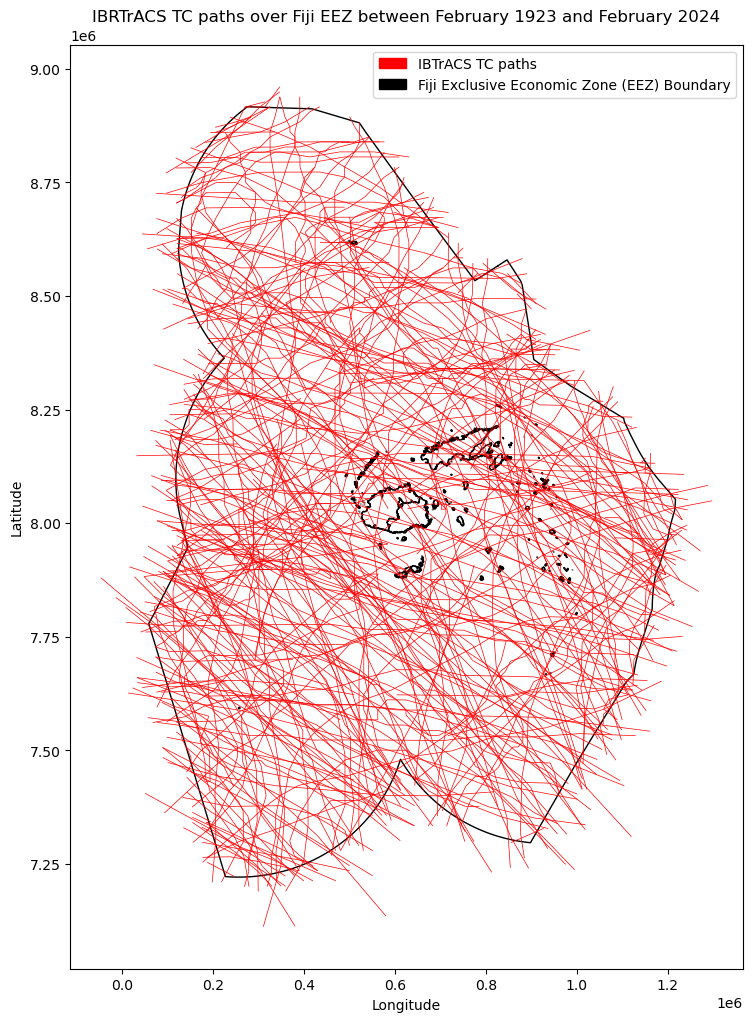

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1)
fiji_provinces.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_fiji_patch = mpatches.Patch(color='red', label='IBTrACS TC paths')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/2793282846.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')


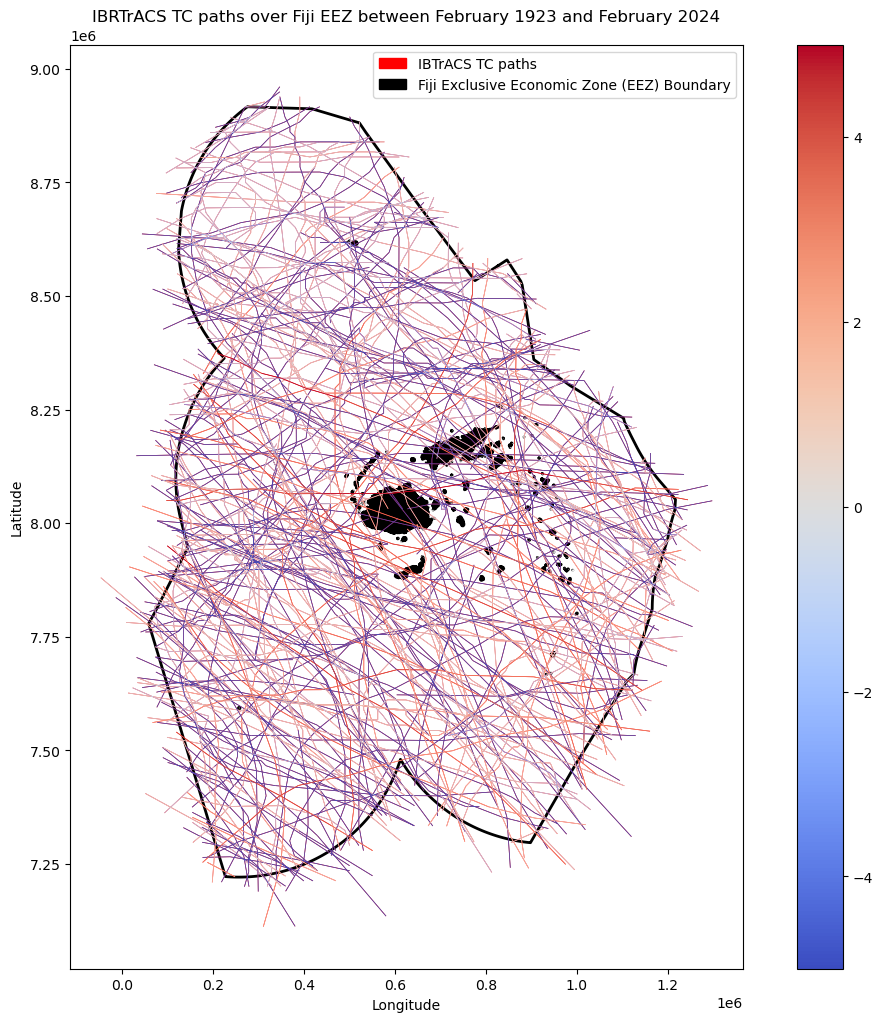

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_fiji_patch = mpatches.Patch(color='red', label='IBTrACS TC paths')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_fiji.plot(ax=ax, column='USA_SSHS', legend=True, cmap='coolwarm', linewidth=0.5)

# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [15]:

print(ibtracs_fiji['USA_SSHS'].value_counts())
# print('total TCs',(len(tdata)))

USA_SSHS
-5    2024
 0     977
-1     756
 1     265
 3     159
 2     149
 4      94
-3      66
 5      13
-2       1
Name: count, dtype: int64


In [16]:
fiji_provinces

GID_1 GID_0 COUNTRY    NAME_1 VARNAME_1 NL_NAME_1    TYPE_1 ENGTYPE_1  \
0  FJI.1_1   FJI    Fiji   Central        NA        NA  Division  Division   
1  FJI.2_1   FJI    Fiji   Eastern        NA        NA  Division  Division   
2  FJI.3_1   FJI    Fiji  Northern        NA        NA  Division  Division   
3  FJI.4_1   FJI    Fiji    Rotuma        NA        NA  Division  Division   
4  FJI.5_1   FJI    Fiji   Western        NA        NA  Division  Division   

  CC_1 HASC_1 ISO_1                                           geometry  
0   NA  FJ.CE  FJ-C  MULTIPOLYGON (((613526.529 7961595.842, 613526...  
1   NA  FJ.EA  FJ-E  MULTIPOLYGON (((932034.101 7668317.897, 932061...  
2   NA  FJ.NO  FJ-N  MULTIPOLYGON (((724390.572 8107337.544, 724479...  
3   NA  FJ.RO  FJ-R  MULTIPOLYGON (((510230.042 8615144.254, 510200...  
4   NA   FJ.W  FJ-W  MULTIPOLYGON (((568332.741 7952544.554, 568313...

In [17]:
fiji_provinces = fiji_provinces.drop(3)
fiji_provinces

GID_1 GID_0 COUNTRY    NAME_1 VARNAME_1 NL_NAME_1    TYPE_1 ENGTYPE_1  \
0  FJI.1_1   FJI    Fiji   Central        NA        NA  Division  Division   
1  FJI.2_1   FJI    Fiji   Eastern        NA        NA  Division  Division   
2  FJI.3_1   FJI    Fiji  Northern        NA        NA  Division  Division   
4  FJI.5_1   FJI    Fiji   Western        NA        NA  Division  Division   

  CC_1 HASC_1 ISO_1                                           geometry  
0   NA  FJ.CE  FJ-C  MULTIPOLYGON (((613526.529 7961595.842, 613526...  
1   NA  FJ.EA  FJ-E  MULTIPOLYGON (((932034.101 7668317.897, 932061...  
2   NA  FJ.NO  FJ-N  MULTIPOLYGON (((724390.572 8107337.544, 724479...  
4   NA   FJ.W  FJ-W  MULTIPOLYGON (((568332.741 7952544.554, 568313...

In [18]:
# # Create a matplotlib figure and axis
# fig, ax = plt.subplots(figsize=(12, 10))

# # Plot the GeoDataFrames on the same axis
# ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
# gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
# fiji_provinces.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# # Define the order of categories, colors, and line widths
# ordered_categories = [5, 4, 3, 2, 1, 0]
# colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue'] 
# line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75] # Adjust these values as needed
# # line_widths = [2.5, 2.0, 1.5, 1.0, 0.75, 0.5] # Adjust these values as needed

# # Plot the ibtracs_fiji GeoDataFrame with different colors and line widths
# for category, color, width in zip(ordered_categories, colors, line_widths):
#     subset = ibtracs_fiji[ibtracs_fiji['NAD_CAT'] == category]
#     # subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}')
#     subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2) # Adding 2 to ensure it's on top of the EEZ and fiji plots

# # Manually create legend handles in the desired order
# legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
#                   for category, color, width in zip(ordered_categories, colors, line_widths)]

# # Setting a base zorder for the background layers.
# fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
# fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

# gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
# fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')

# # Specify the order of handles in the legend
# ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]

# # Then iterate and place labels
# for idx, row in fiji_provinces.iterrows():
#     # Get the centroid of the geometry to place the label
#     centroid = row.geometry.centroid

#     # Initialize variables for text position and alignment
#     x_pos = centroid.x
#     y_pos = centroid.y
#     # alignment = alignment
#    # Conditional logic to customize label placement
#     if row['NAME_1'] == 'Central':
#         # alignment = 'right'
#         y_pos += 12.8
#     elif row['NAME_1'] == 'Northern':
#         # alignment = 'right'
#         x_pos -= 31.5
#     elif row['NAME_1'] == 'Western':
#         # alignment = 'left'
#         x_pos -= -11.5
#     elif row['NAME_1'] == 'Eastern':
#         # Corrected from 'Right' to 'right'
#         # alignment = 'right'
#         x_pos += 15.5
#         y_pos += 11.05

#     # Add the text label with the selected alignment and position
#     ax.text(
#         x_pos,
#         y_pos,
#         row['NAME_1'],
#         horizontalalignment=alignment,
#         fontsize=9,
#         color='red',
#         fontweight='bold',
#         zorder=3
#     )


# # Add the custom legend handles in the specified order
# ax.legend(handles=ordered_handles, loc='upper right')

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Display the plot
# plt.show()


/tmp/ipykernel_1337/2839033667.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')
/tmp/ipykernel_1337/2839033667.py:74: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')


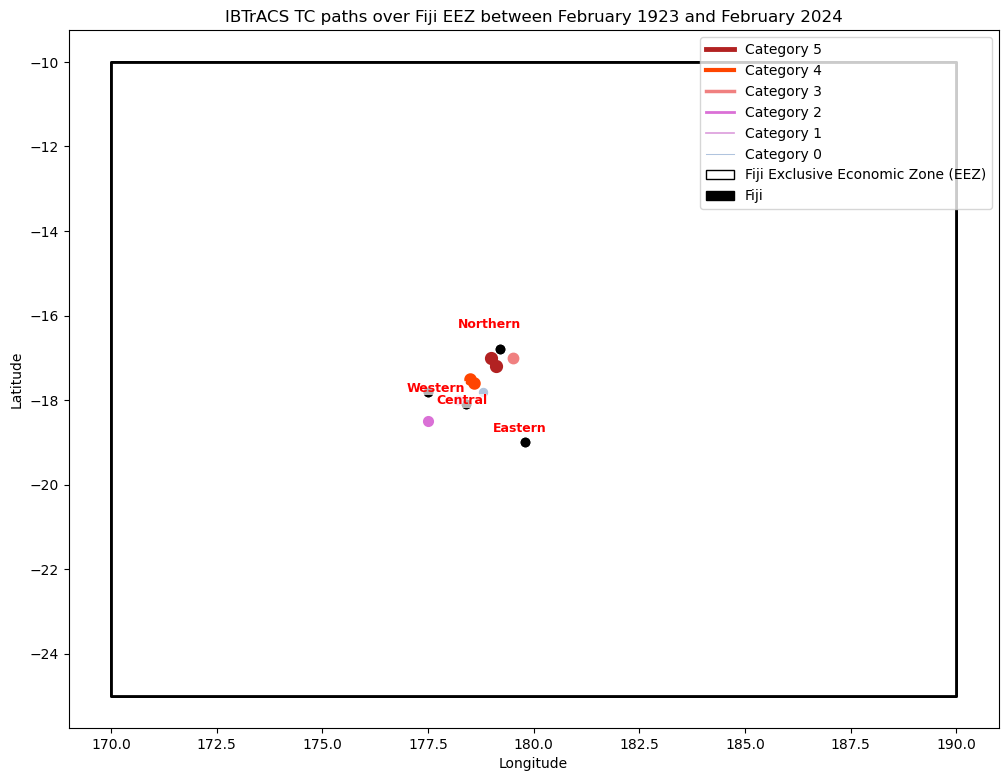

In [47]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_fiji.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
fiji_provinces.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue']
line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75]

# Plot the ibtracs_fiji GeoDataFrame with different colors and line widths
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_fiji[ibtracs_fiji['NAD_CAT'] == category]
    # subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}')
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2) # Adding 2 to ensure it's on top of the EEZ and fiji plots

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Setting a base zorder for the background layers.
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]

# Iterate and place labels with a high zorder to ensure they are on top.
for idx, row in fiji_provinces.iterrows():
    # Get the centroid of the geometry to place the label
    centroid = row.geometry.centroid
    x_pos = centroid.x
    y_pos = centroid.y
    alignment = 'center'

    # Conditional logic to customize label placement based on your request.
    if row['NAME_1'] == 'Central':
        alignment = 'right'
        x_pos += 0.5
    elif row['NAME_1'] == 'Northern':
        # Move Northern label up as requested
        y_pos += 0.5
        alignment = 'right'
        x_pos += 0.5
    elif row['NAME_1'] == 'Western':
        alignment = 'left'
        x_pos -= 0.5
    elif row['NAME_1'] == 'Eastern':
        alignment = 'right'
        x_pos += 0.5
        y_pos += 0.25

    # Add the text label with the selected alignment and position, and a high zorder.
    ax.text(
        x_pos,
        y_pos,
        row['NAME_1'],
        ha=alignment,  # Corrected parameter name
        fontsize=9,
        color='red',
        fontweight='bold',
        zorder=10, # Using a high number to ensure it's in the foreground
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.2)
    )

# Legend and final plot details
gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')
ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]
ax.legend(handles=ordered_handles, loc='upper right')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()


/tmp/ipykernel_1337/2388161239.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')


Text(105.34722222222221, 0.5, 'Latitude')

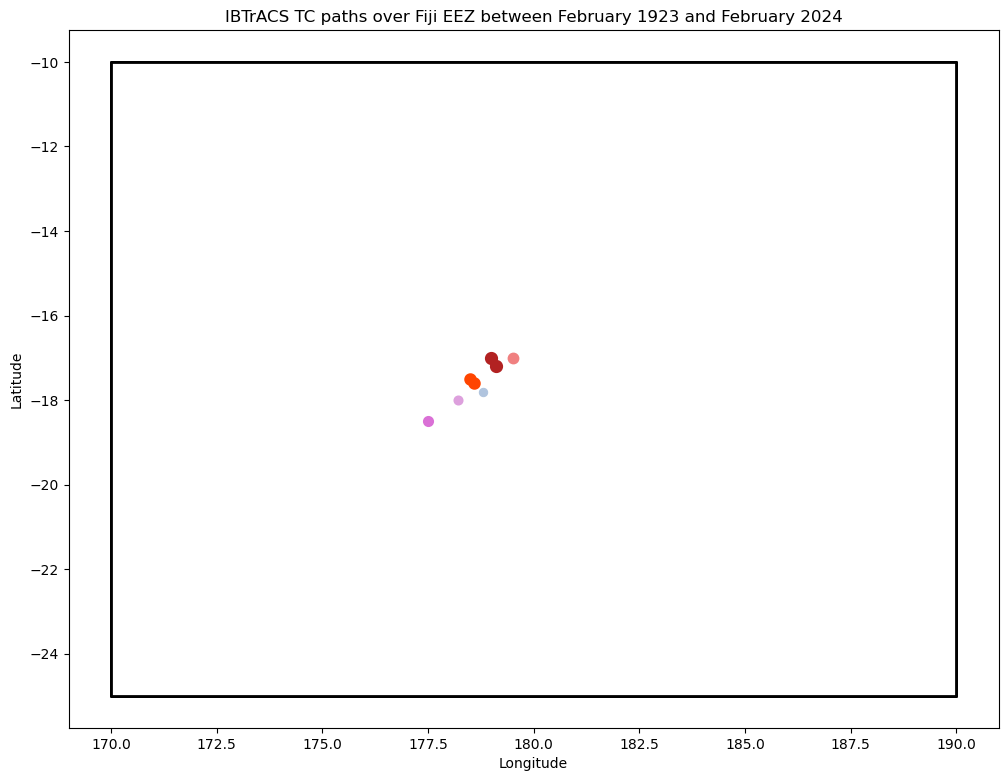

In [48]:
# --- Start of your plotting code ---
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the background layers first
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
fiji_provinces.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)


# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue']
line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75]

# Plot the ibtracs_fiji GeoDataFrame with different colors and line widths
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_fiji[ibtracs_fiji['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2)

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Setting a base zorder for the background layers.
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
# fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]

# # Iterate and place labels with a high zorder to ensure they are on top.
# for idx, row in fiji_provinces.iterrows():
#     # Get the centroid of the geometry to place the label
#     centroid = row.geometry.centroid
#     x_pos = centroid.x
#     y_pos = centroid.y
#     alignment = 'center'

#     # Conditional logic to customize label placement based on your request.
#     if row['NAME_1'] == 'Central':
#         alignment = 'right'
#         x_pos += 0.5
#     elif row['NAME_1'] == 'Northern':
#         # Move Northern label up as requested
#         y_pos += 0.5
#         alignment = 'right'
#         x_pos += 0.5
#     elif row['NAME_1'] == 'Western':
#         alignment = 'left'
#         x_pos -= 0.5
#     elif row['NAME_1'] == 'Eastern':
#         alignment = 'right'
#         x_pos += 0.5
#         y_pos += 0.25

#     # Add the text label with the selected alignment and position, and a high zorder.
#     ax.text(
#         x_pos,
#         y_pos,
#         row['NAME_1'],
#         ha=alignment,  # Corrected parameter name
#         fontsize=9,
#         color='red',
#         fontweight='bold',
#         zorder=10, # Using a high number to ensure it's in the foreground
#         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.2)
    # )

# # Legend and final plot details
# gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
# fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')
# ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]
# ax.legend(handles=ordered_handles, loc='upper right')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


/tmp/ipykernel_1337/2388161239.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')


Text(105.34722222222221, 0.5, 'Latitude')

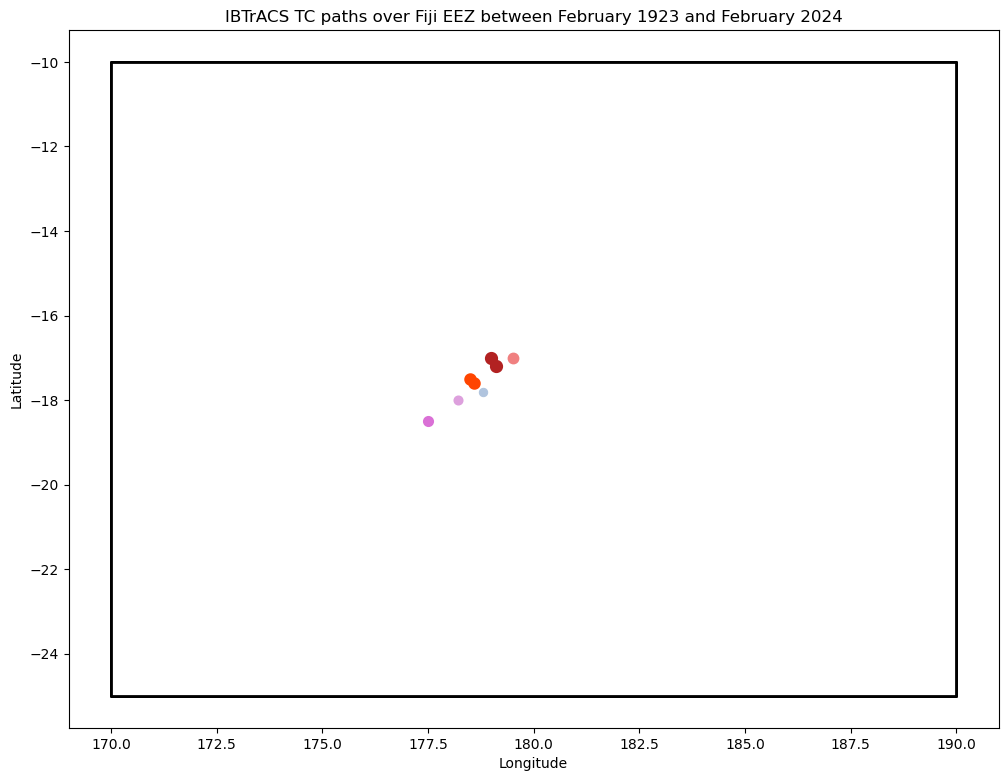

In [48]:
# --- Start of your plotting code ---
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the background layers first
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
fiji_provinces.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)
gdf_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)


# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue']
line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75]

# Plot the ibtracs_fiji GeoDataFrame with different colors and line widths
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_fiji[ibtracs_fiji['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2)

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Setting a base zorder for the background layers.
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
# fiji.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]

# # Iterate and place labels with a high zorder to ensure they are on top.
# for idx, row in fiji_provinces.iterrows():
#     # Get the centroid of the geometry to place the label
#     centroid = row.geometry.centroid
#     x_pos = centroid.x
#     y_pos = centroid.y
#     alignment = 'center'

#     # Conditional logic to customize label placement based on your request.
#     if row['NAME_1'] == 'Central':
#         alignment = 'right'
#         x_pos += 0.5
#     elif row['NAME_1'] == 'Northern':
#         # Move Northern label up as requested
#         y_pos += 0.5
#         alignment = 'right'
#         x_pos += 0.5
#     elif row['NAME_1'] == 'Western':
#         alignment = 'left'
#         x_pos -= 0.5
#     elif row['NAME_1'] == 'Eastern':
#         alignment = 'right'
#         x_pos += 0.5
#         y_pos += 0.25

#     # Add the text label with the selected alignment and position, and a high zorder.
#     ax.text(
#         x_pos,
#         y_pos,
#         row['NAME_1'],
#         ha=alignment,  # Corrected parameter name
#         fontsize=9,
#         color='red',
#         fontweight='bold',
#         zorder=10, # Using a high number to ensure it's in the foreground
#         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.2)
    # )

# # Legend and final plot details
# gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
# fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')
# ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]
# ax.legend(handles=ordered_handles, loc='upper right')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [49]:
plt.savefig('1c.png', dpi=800)

<Figure size 640x480 with 0 Axes>

In [46]:
# Display the plot
plt.show()

/tmp/ipykernel_1337/2274076272.py:97: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')


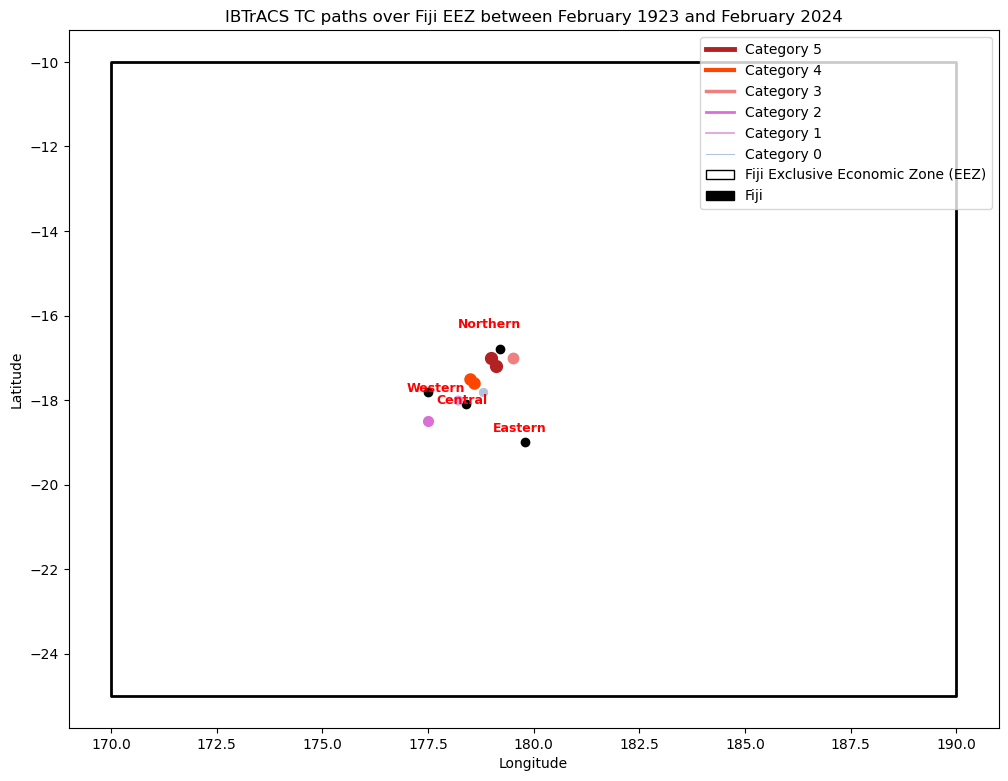

In [21]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# --- Dummy Data for a runnable example ---
# NOTE: In your actual code, these GeoDataFrames would be loaded from files.
ibtracs_fiji_data = {
    'NAD_CAT': [5, 4, 3, 2, 1, 0, 5, 4],
    'geometry': [
        Point(179, -17), Point(178.5, -17.5), Point(179.5, -17), Point(177.5, -18.5),
        Point(178.2, -18.0), Point(178.8, -17.8), Point(179.1, -17.2), Point(178.6, -17.6)
    ]
}
ibtracs_fiji = gpd.GeoDataFrame(ibtracs_fiji_data, geometry='geometry')

gdf_eez_data = {
    'NAME': ['Fiji EEZ'],
    'geometry': [Polygon([(170, -10), (190, -10), (190, -25), (170, -25)])]
}
gdf_eez = gpd.GeoDataFrame(gdf_eez_data, geometry='geometry')
fiji_eez = gdf_eez # Using a single variable for consistency

fiji_provinces_data = {
    'NAME_1': ['Central', 'Northern', 'Western', 'Eastern'],
    'geometry': [
        Point(178.4, -18.1),
        Point(179.2, -16.8),
        Point(177.5, -17.8),
        Point(179.8, -19.0)
    ]
}
fiji_provinces = gpd.GeoDataFrame(fiji_provinces_data, geometry='geometry')
fiji = fiji_provinces # Using a single variable for consistency

# --- Start of your plotting code ---
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the background layers first
fiji_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=1)
fiji_provinces.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=2)

# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue']
line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75]

# Plot the ibtracs_fiji GeoDataFrame with different colors and line widths.
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_fiji[ibtracs_fiji['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 3)

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Iterate and place labels with a high zorder to ensure they are on top.
for idx, row in fiji_provinces.iterrows():
    # Get the centroid of the geometry to place the label
    centroid = row.geometry.centroid
    x_pos = centroid.x
    y_pos = centroid.y
    alignment = 'center'

    # Conditional logic to customize label placement based on your request.
    if row['NAME_1'] == 'Central':
        alignment = 'right'
        x_pos += 0.5
    elif row['NAME_1'] == 'Northern':
        # Move Northern label up as requested
        y_pos += 0.5
        alignment = 'right'
        x_pos += 0.5
    elif row['NAME_1'] == 'Western':
        alignment = 'left'
        x_pos -= 0.5
    elif row['NAME_1'] == 'Eastern':
        alignment = 'right'
        x_pos += 0.5
        y_pos += 0.25

    # Add the text label with the selected alignment and position, and a high zorder.
    ax.text(
        x_pos,
        y_pos,
        row['NAME_1'],
        horizontalalignment=alignment,
        fontsize=9,
        color='red',
        fontweight='bold',
        zorder=10 # Using a high number to ensure it's in the foreground
    )

# Legend and final plot details
gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Fiji Exclusive Economic Zone (EEZ)')
fiji_patch = mpatches.Patch(color='black', edgecolor='black', label='Fiji')
ordered_handles = legend_handles + [gdf_eez_patch, fiji_patch]
ax.legend(handles=ordered_handles, loc='upper right')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Fiji EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()


In [22]:
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu = gpd.read_file("vanuatu-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu_eez = gpd.read_file("Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)

/tmp/ipykernel_1337/4211773393.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_1337/4211773393.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
/tmp/ipykernel_1337/4211773393.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in

<Axes: >

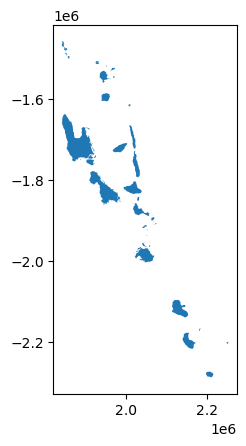

In [23]:
vanuatu.plot()

<Axes: >

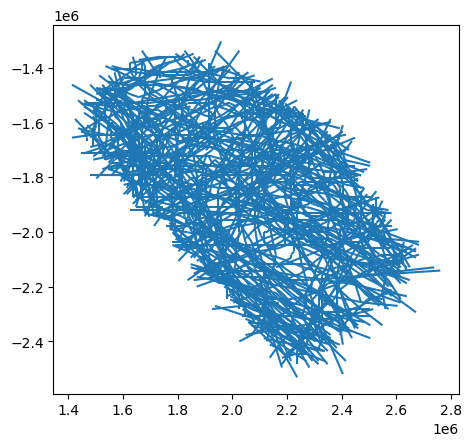

In [24]:
ibtracs_vanuatu.plot()

<Axes: >

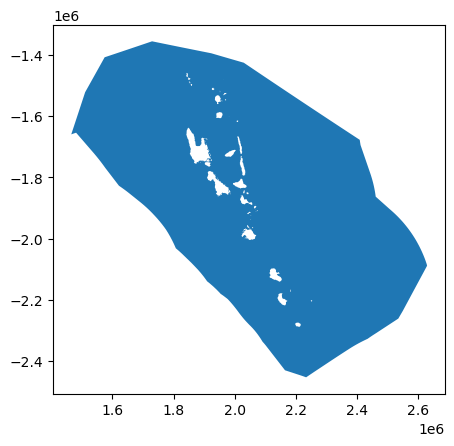

In [25]:
vanuatu_eez.plot()

/tmp/ipykernel_1337/3419684123.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


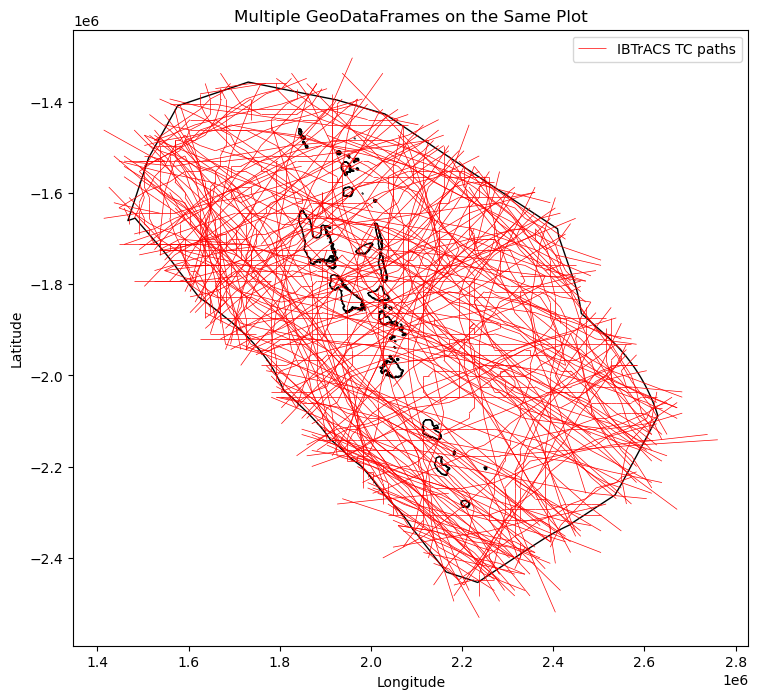

In [26]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='IBTrACS TC paths')
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Layer 2')
vanuatu.plot(ax=ax, color='white', edgecolor='black', linewidth=1, label='Fiji')


# Add a legend
ax.legend()

# Add titles and labels
ax.set_title('Multiple GeoDataFrames on the Same Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/2793075155.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


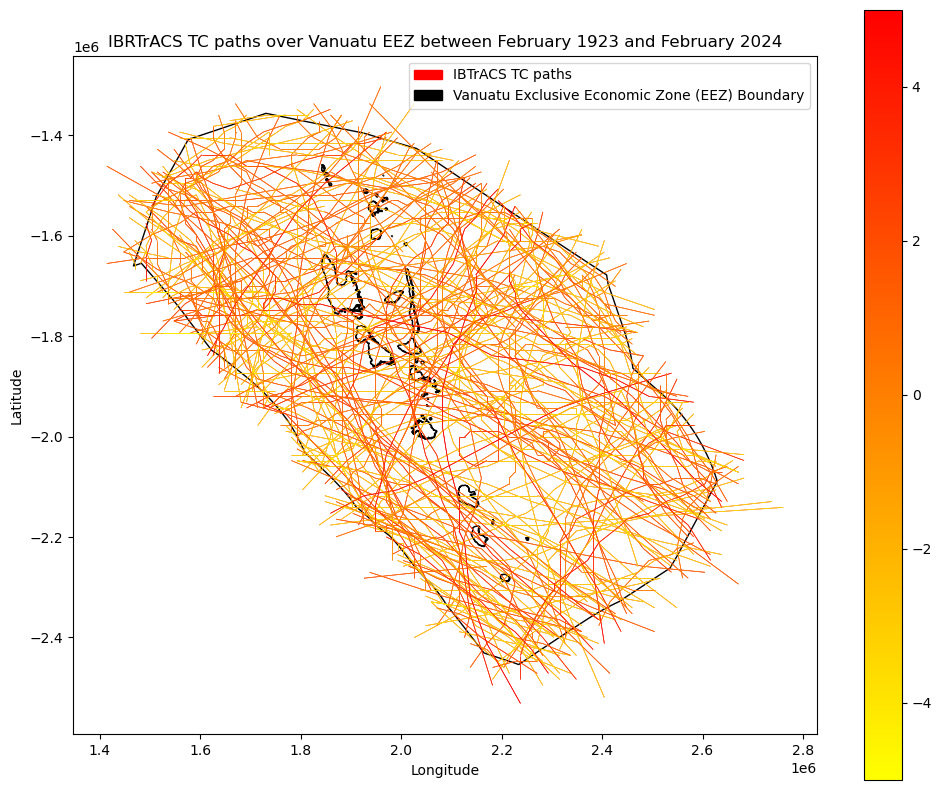

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=1)
vanuatu.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='autumn_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/4112131594.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


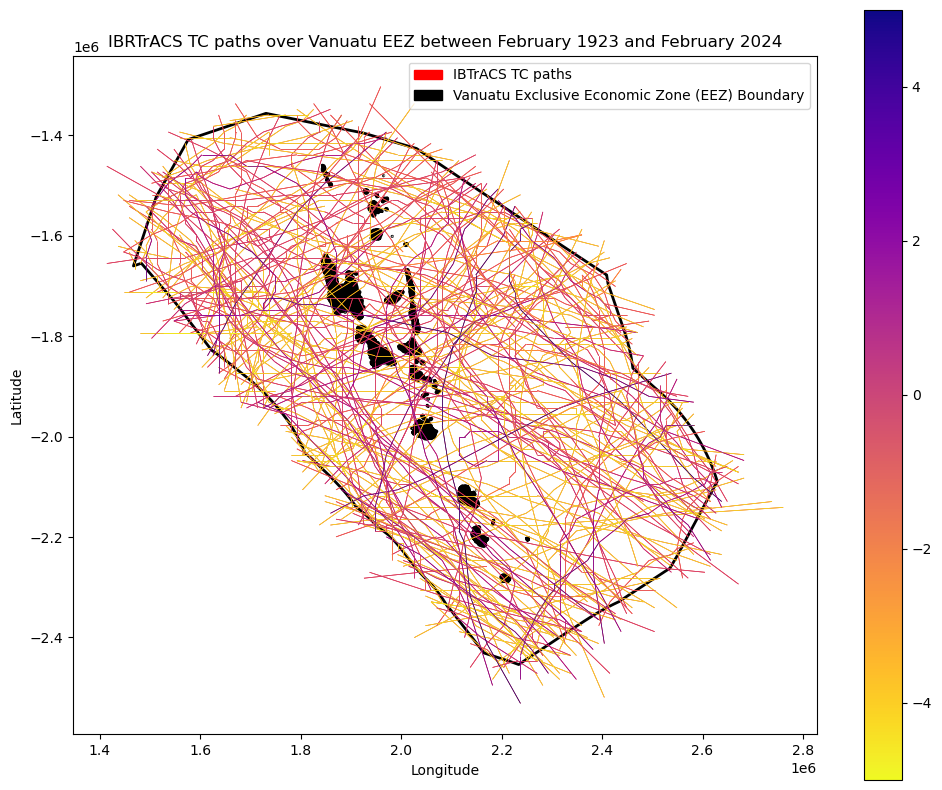

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='plasma_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/1730653190.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


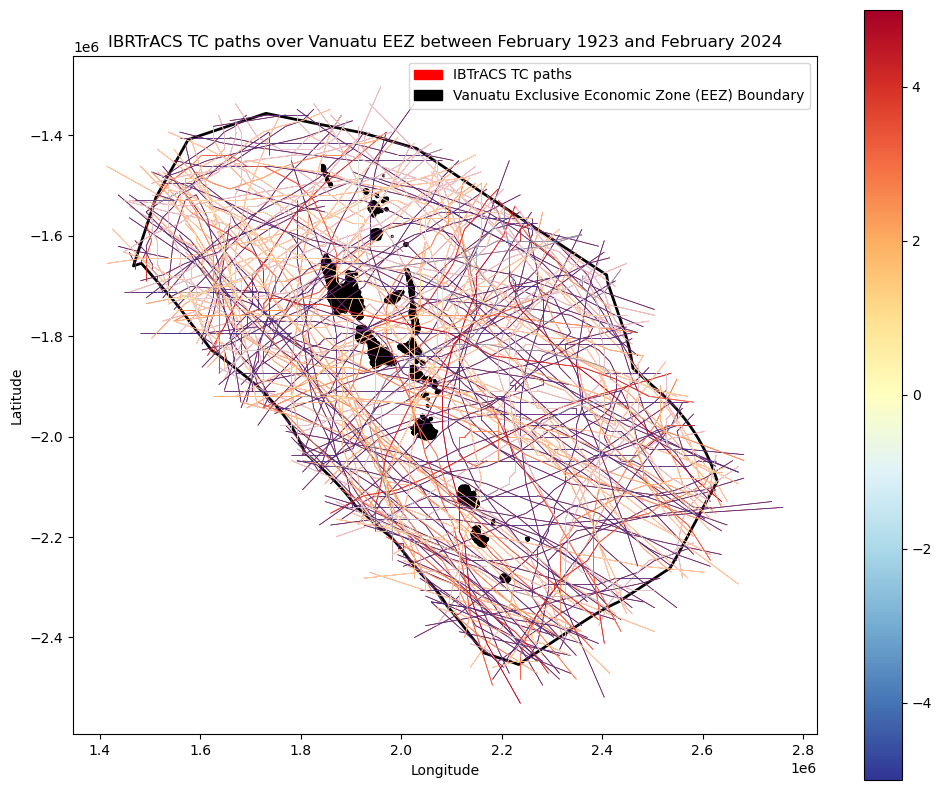

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='RdYlBu_r', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/tmp/ipykernel_1337/2708753823.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')


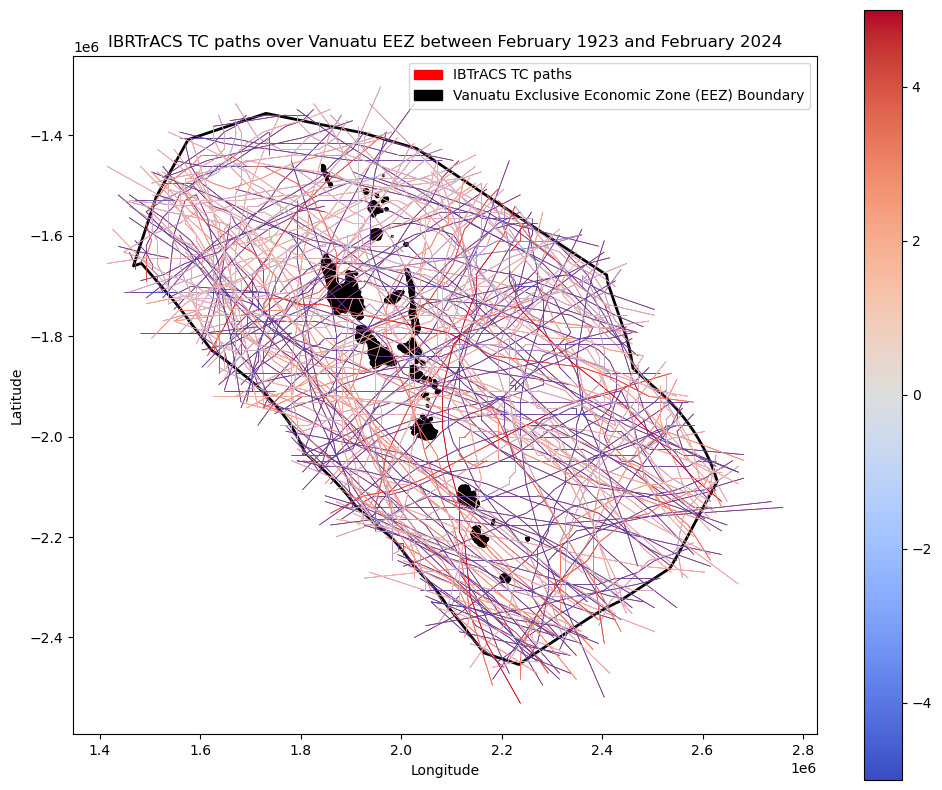

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Manually create legend handles
ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=True, cmap='coolwarm', linewidth=0.5)


# Add a legend with the custom handles
ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# Add titles and labels
ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [31]:
sss_categories = ibtracs_vanuatu['USA_SSHS'].unique()
print(sss_categories)

bom_categories = ibtracs_vanuatu['BOM_TYPE'].unique()
print(bom_categories)

[-5 -1  0  1  2  3  4  5 -3 -2]
[ 0. 30. 40. 20.]


In [32]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Create a matplotlib figure and axis
# fig, ax = plt.subplots(figsize=(12, 10))

# # Plot the GeoDataFrames on the same axis
# ibtracs_vanuatu.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
# vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
# vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# # Manually create legend handles

# # Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# # Assuming 'USA_SSHS' column has integers representing different categories
# categories = ibtracs_vanuatu['USA_SSHS'].unique()
# colors = ['maroon', 'firebrick', 'indianred', 'lightcoral', 'palevioletred', 'mediumvioletred', 'mediumpurple', 'indigo', 'navy']  # Define colors for each category

# or category, color in zip(categories, colors):
#     subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
#     subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# # Manually create legend handles
# legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(categories, colors)]
# gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# # Add the custom legend handles
# ax.legend(handles=legend_handles + [gdf_eez_patch, vanuatu_patch])

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

# # ibtracs_vanuatu_patch = mpatches.Patch(color='red', label='IBTrACS TC paths (February 1923 to February 2024)')
# # gdf_eez_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# # fiji_patch = mpatches.Patch(color='white', edgecolor='black', label='Fiji')

# # gdf.plot(ax=ax, transform=ccrs.PlateCarree(), column='your_column_name', legend=True, cmap='viridis')
# ibtracs_vanuatu.plot(ax=ax, column='USA_SSHS', legend=False, cmap='coolwarm', linewidth=0.5)


# # Add a legend with the custom handles
# ax.legend(handles=[ibtracs_fiji_patch, gdf_eez_patch])

# # Add titles and labels
# ax.set_title('IBRTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

/tmp/ipykernel_1337/972284701.py:20: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')
/tmp/ipykernel_1337/972284701.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
/tmp/ipykernel_1337/972284701.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')


Text(143.82524165711308, 0.5, 'Latitude')

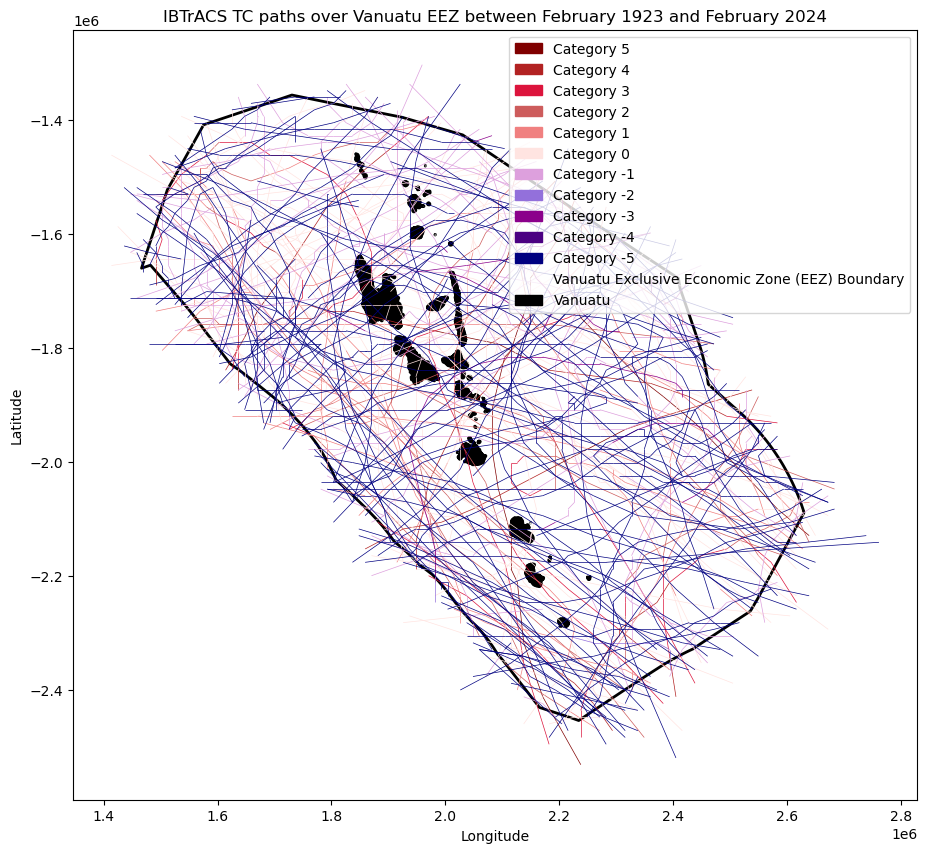

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories and their corresponding colors
ordered_categories = [5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5]  # Example categories
colors = ['maroon', 'firebrick', 'crimson', 'indianred', 'lightcoral', 'mistyrose', 'plum', 'mediumpurple', 'darkmagenta', 'indigo', 'navy']  # Define colors for each category

# Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# Assuming 'USA_SSHS' column has integers representing different categories
for category, color in zip(ordered_categories, colors):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
    subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# Manually create legend handles in the desired order
legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors)]
gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles)

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
# plt.show()


# # Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# # Assuming 'USA_SSHS' column has integers representing different categories

# # categories = ibtracs_vanuatu['USA_SSHS'].unique()
# # colors = ['maroon', 'firebrick', 'indianred', 'lightcoral', 'palevioletred', 'mediumvioletred', 'mediumpurple', 'indigo', 'navy']  # Define colors for each category

# for category, color in zip(categories, colors):
#     subset = ibtracs_vanuatu[ibtracs_vanuatu['USA_SSHS'] == category]
#     subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# # Manually create legend handles
# legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(categories, colors)]
# gdf_eez_patch = mpatches.Patch(color='none', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ) Boundary')
# vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# # Add the custom legend handles
# ax.legend(handles=legend_handles + [gdf_eez_patch, vanuatu_patch])

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Show the plot
# plt.show()

In [34]:
nad_categories = ibtracs_vanuatu['NAD_CAT'].unique()
print(nad_categories)
# bom_categories = ibtracs_vanuatu['BOM_TYPE'].unique()
# print(bom_categories)

[ 0. -1.  1.  4.  3.  2.  5.]


/tmp/ipykernel_1337/2497787907.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')


Text(143.82524165711308, 0.5, 'Latitude')

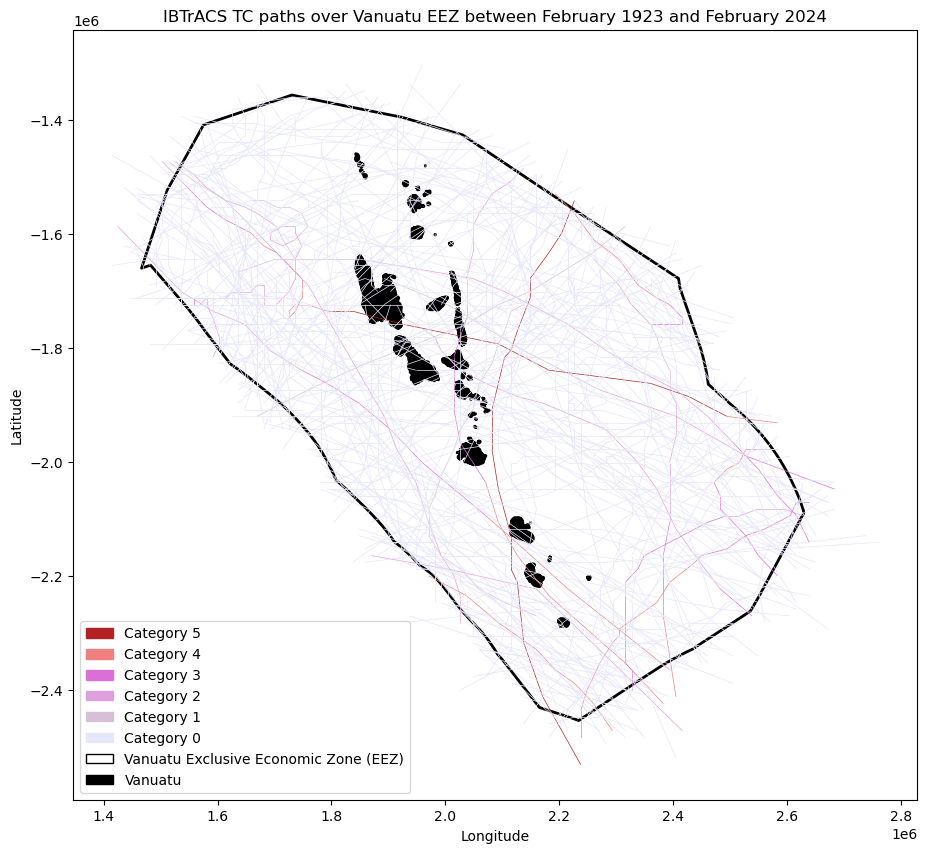

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories and their corresponding colors
ordered_categories = [5, 4, 3, 2, 1, 0]  # Example categories
colors = ['firebrick', 'lightcoral', 'orchid', 'plum', 'thistle', 'lavender']  # Define colors for each category

# Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# Assuming 'USA_SSHS' column has integers representing different categories
for category, color in zip(ordered_categories, colors):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
    subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')

# Manually create legend handles in the desired order
legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors)]
gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ)')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles, loc='lower left')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [36]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Create a matplotlib figure and axis
# fig, ax = plt.subplots(figsize=(12, 10))

# # Plot the GeoDataFrames on the same axis
# vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
# vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# # Define the order of categories and their corresponding colors
# ordered_categories = [5, 4, 3, 2, 1, 0]  # Example categories
# colors = ['firebrick', 'lightcoral', 'orchid', 'plum', 'thistle', 'lavender']  # Define colors for each category
# line_widths = [2.5, 2.0, 1.5, 1.0, 0.75, 0.5] # Adjust these values as needed

# # Plot the ibtracs_vanuatu GeoDataFrame with different colors based on the 'USA_SSHS' column
# # Assuming 'USA_SSHS' column has integers representing different categories
# for category, color, width in zip(ordered_categories, colors, line_widths):
#     subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
#     # subset.plot(ax=ax, color=color, linewidth=0.5, label=f'Category {category}')
#     subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}')

# # Manually create legend handles in the desired order
# legend_handles = [mpatches.Patch(color=color, label=f'Category {category}') for category, color in zip(ordered_categories, colors, line_widths)]
# gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Vanuatu Exclusive Economic Zone (EEZ)')
# vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Vanuatu')

# # Specify the order of handles in the legend
# ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# # Add the custom legend handles in the specified order
# ax.legend(handles=ordered_handles, loc='lower left')

# # Add titles and labels
# ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')



/tmp/ipykernel_1337/4091530742.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Land area')


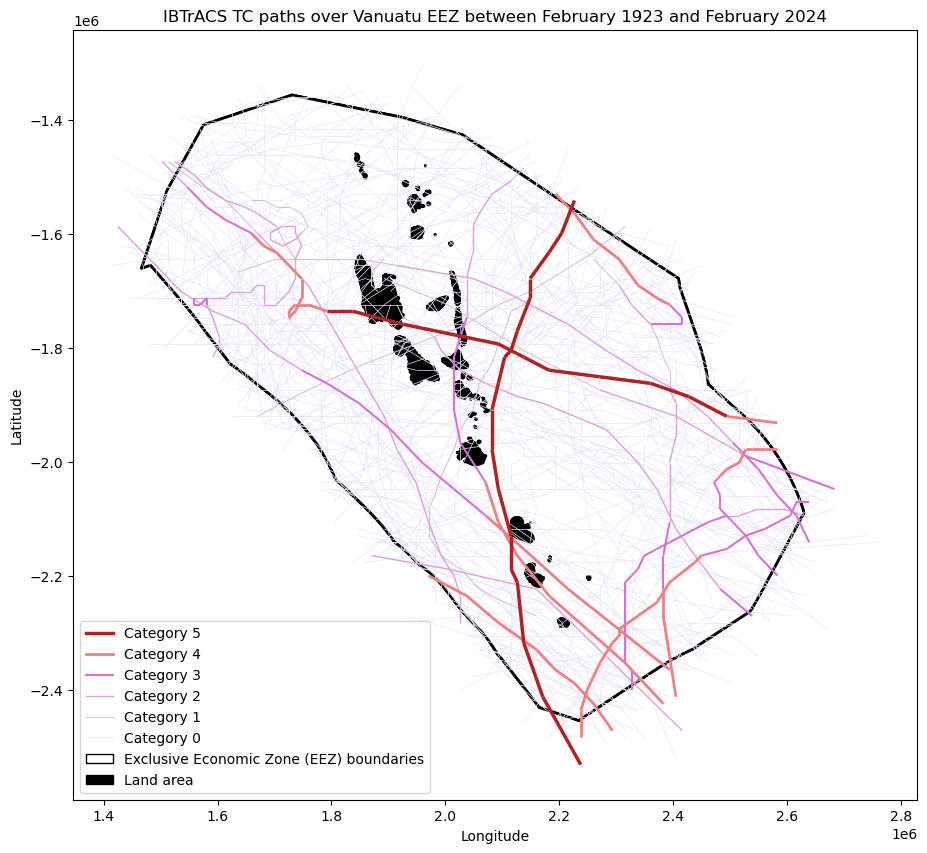

In [37]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'lightcoral', 'orchid', 'plum', 'thistle', 'lavender']
line_widths = [3.5, 3.0, 2.5, 2.0, 1.5, 1] # Adjust these values as needed
line_widths = [2.5, 2.0, 1.5, 1.0, 0.75, 0.5] # Adjust these values as needed

# Plot the ibtracs_vanuatu GeoDataFrame with different colors and line widths
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
    # subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}')
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2) # Adding 2 to ensure it's on top of the EEZ and Vanuatu plots

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Setting a base zorder for the background layers.
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Exclusive Economic Zone (EEZ) boundaries')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Land area')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles, loc='lower left')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()


/tmp/ipykernel_1337/2573979032.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Land area')


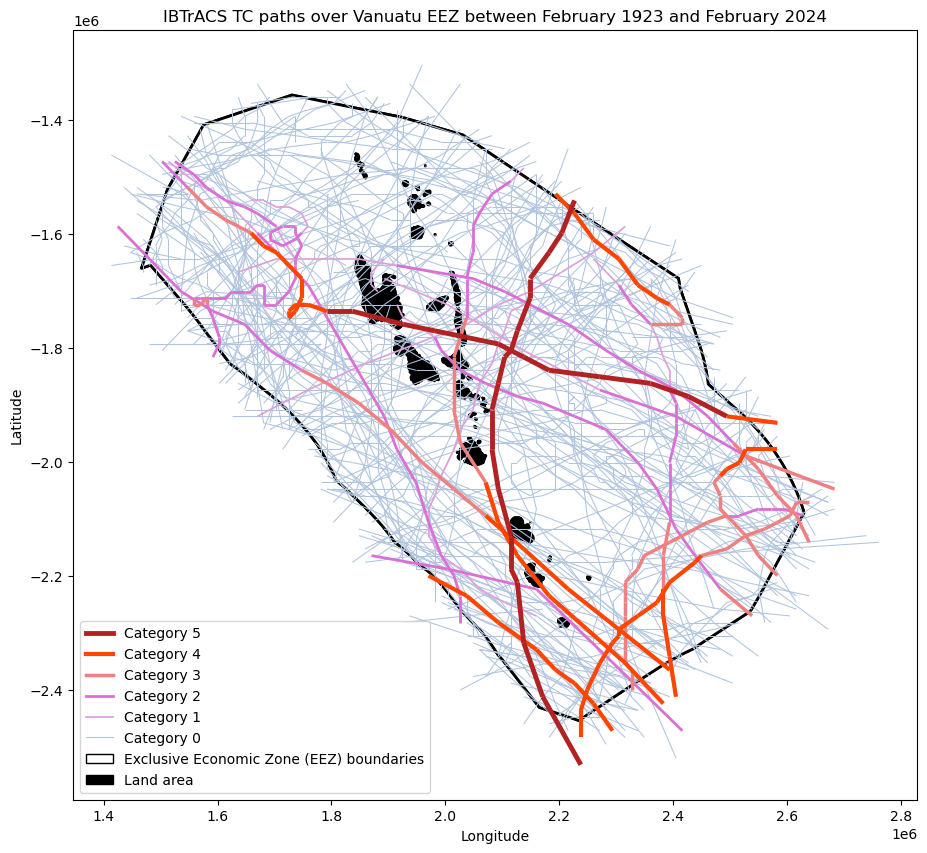

In [38]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the GeoDataFrames on the same axis
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1)

# Define the order of categories, colors, and line widths
ordered_categories = [5, 4, 3, 2, 1, 0]
colors = ['firebrick', 'OrangeRed', 'lightcoral', 'orchid', 'plum', 'LightSteelBlue'] 
line_widths = [3.5, 3.0, 2.5, 2.0, 1.25, 0.75] # Adjust these values as needed
# line_widths = [2.5, 2.0, 1.5, 1.0, 0.75, 0.5] # Adjust these values as needed

# Plot the ibtracs_vanuatu GeoDataFrame with different colors and line widths
for category, color, width in zip(ordered_categories, colors, line_widths):
    subset = ibtracs_vanuatu[ibtracs_vanuatu['NAD_CAT'] == category]
    # subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}')
    subset.plot(ax=ax, color=color, linewidth=width, label=f'Category {category}', zorder=category + 2) # Adding 2 to ensure it's on top of the EEZ and Vanuatu plots

# Manually create legend handles in the desired order
legend_handles = [mlines.Line2D([], [], color=color, linewidth=width, label=f'Category {category}')
                  for category, color, width in zip(ordered_categories, colors, line_widths)]

# Setting a base zorder for the background layers.
vanuatu_eez.plot(ax=ax, color='white', edgecolor='black', linewidth=2, zorder=0)
vanuatu.plot(ax=ax, color='black', edgecolor='black', linewidth=1, zorder=1)

gdf_eez_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Exclusive Economic Zone (EEZ) boundaries')
vanuatu_patch = mpatches.Patch(color='black', edgecolor='black', label='Land area')

# Specify the order of handles in the legend
ordered_handles = legend_handles + [gdf_eez_patch, vanuatu_patch]

# Add the custom legend handles in the specified order
ax.legend(handles=ordered_handles, loc='lower left')

# Add titles and labels
ax.set_title('IBTrACS TC paths over Vanuatu EEZ between February 1923 and February 2024')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()


In [39]:
unique_value_counts = ibtracs_vanuatu['NAD_CAT'].value_counts()
print(unique_value_counts)

NAD_CAT
 0.0    2952
-1.0     230
 2.0     103
 3.0      65
 1.0      58
 4.0      57
 5.0      30
Name: count, dtype: int64


In [40]:
ibtracs = unique_value_counts = ibtracs_fiji['NAD_CAT'].value_counts()
print(unique_value_counts)

NAD_CAT
5    2
4    2
3    1
2    1
1    1
0    1
Name: count, dtype: int64


In [41]:
fiji_value_counts = ibtracs_fiji['NAME'].value_counts()
print(fiji_value_counts)

KeyError: 'NAME'

In [ ]:
tcs_vanuatu_counts = ibtracs_vanuatu['NAME'].value_counts()
print(tcs_vanuatu_counts)

In [ ]:
print(subset.columns)

In [ ]:
#Spatial join them and keep the fields BK_left, BK_right
land_tcs_vanuatu = gpd.sjoin(left_df=ibtracs_vanuatu, right_df=vanuatu, how="inner", predicate="intersects")#[[f"{matchfield}_left", f"{matchfield}_right"]]
land_tcs_fiji = gpd.sjoin(left_df=ibtracs_fiji, right_df=fiji, how="inner", predicate="intersects")#[[f"{matchfield}_left", f"{matchfield}_right"]]

In [ ]:
len(land_tcs_vanuatu['NAME'].value_counts())

In [ ]:
len(land_tcs_fiji['NAME'].value_counts())

In [ ]:
# # Set the display option to show all columns
# subset.set_option('display.max_columns', None)

# # Print the columns of the DataFrame
# print(subset.columns)

In [ ]:
print(ibtracs_fiji.columns.unique())


In [ ]:
print(ibtracs_fiji.columns)

In [ ]:
print(", ".join(ibtracs_fiji.columns))

In [ ]:
bbox_fiji = gpd.read_file("bbox_fiji.geojson").to_crs("EPSG:3832").fillna(0)
fiji = gpd.read_file("fiji-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_fiji = gpd.read_file("IBTrACS_Fiji_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
fiji_eez = gpd.read_file("Fiji_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
bbox_vanuatu = gpd.read_file("bbox_vanuatu.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu = gpd.read_file("vanuatu-land.geojson").to_crs("EPSG:3832").fillna(0)
ibtracs_vanuatu = gpd.read_file("IBTrACS_Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)
vanuatu_eez = gpd.read_file("Vanuatu_EEZ.geojson").to_crs("EPSG:3832").fillna(0)

In [ ]:
# Create a plot for the first GeoDataFrame and get the axes
ax = fiji.plot(color='blue', edgecolor='black', figsize=(10, 10))

# Plot the additional GeoDataFrames on the same axes
fiji.plot(ax=ax, color='lightsteelblue', edgecolor='black')
vanuatu.plot(ax=ax, color='lightsteelblue', edgecolor='black')

# Customize the plot (optional)
plt.title('Locations of Vanuatu and Fiji within the Pacific Ocean Basin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()